### Import necessary libraries

In [ ]:
from openai import OpenAI
import time

### Create an OpenAI client.

In [ ]:
client = OpenAI()

### Retrieve the Assistant using id from playground.
You can configure an assistant in OpenAI Playground and import it in your code. In the below examples I have created a chatbot called **Math Tutor**, specified **Instructions** for bot to follow and which **model** to use.

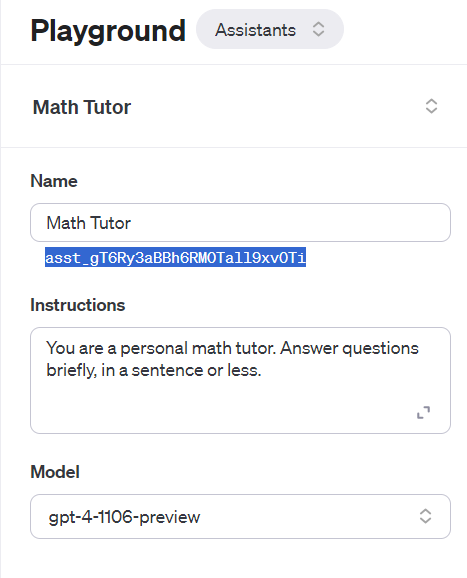

### ⚠️ Update this value from the one available in playground.

In [ ]:
assistant_id = 'asst_gT6Ry3aBBh6RM0Tall9xvOTi'

In [ ]:
assistant = client.beta.assistants.retrieve(assistant_id)
print('Bot Instructions: '+ assistant.instructions)

### Helper function to get response from OpenAI

In [ ]:
def wait_on_run(run, thread):
    while run.status == "queued" or run.status == "in_progress":
        run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id,
        )
        time.sleep(0.5)
    return run

### Helper function to do the necessary set-up before sending request to GPT model. 
It calls `wait_on_run` inside it.

In [ ]:
def get_response_from_gpt(user_input):
    
    message = client.beta.threads.messages.create(thread_id=thread.id, role="user", content=user_input)
    
    run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)
    run = wait_on_run(run, thread)
    messages = client.beta.threads.messages.list(thread_id=thread.id)
    
    return messages.data[0].content[0].text.value

### Conversation loop. 
User can leve the input blank to finish the conversation.

#### Example
1. Explain pythagoras theorem.
2. What is fibonacci series?
3. Explain golden ratio
4. Find x. 2x-10 = 100

In [ ]:
user_input = ""
thread = client.beta.threads.create()
while True:
    user_input = input('🧔: ')
    if user_input == "":
        print('🤖: Goodbye! 👋')
        break
    print('🤖: Thinking...')
    print('🤖: '+ get_response_from_gpt(user_input))